In [1]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
fp = "extra data/Turbines_20230629.xlsx"
df_turbines = pd.read_excel(fp, sheet_name="Turbines")

# Extract relevant columns and clean data
df_turbines = df_turbines.rename(columns=lambda x: x.strip())  # Strip whitespace from column names

# Select "Rated power" and "Nacelle weight" columns
df_cleaned = df_turbines[["Rated power", "Nacelle weight"]].copy()

# Convert to numeric values, forcing errors to NaN and dropping NaN rows
df_cleaned["Rated power"] = pd.to_numeric(df_cleaned["Rated power"], errors="coerce")
df_cleaned["Nacelle weight"] = pd.to_numeric(df_cleaned["Nacelle weight"], errors="coerce")

# Drop NaN values
df_cleaned = df_cleaned.dropna()


/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_70422/1682562393.py:20: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1017: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_70422/1682562393.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  params_exp, _ = curve_fit(exp_func, x, y, maxfev=10000)  # Increased iterations for better convergence


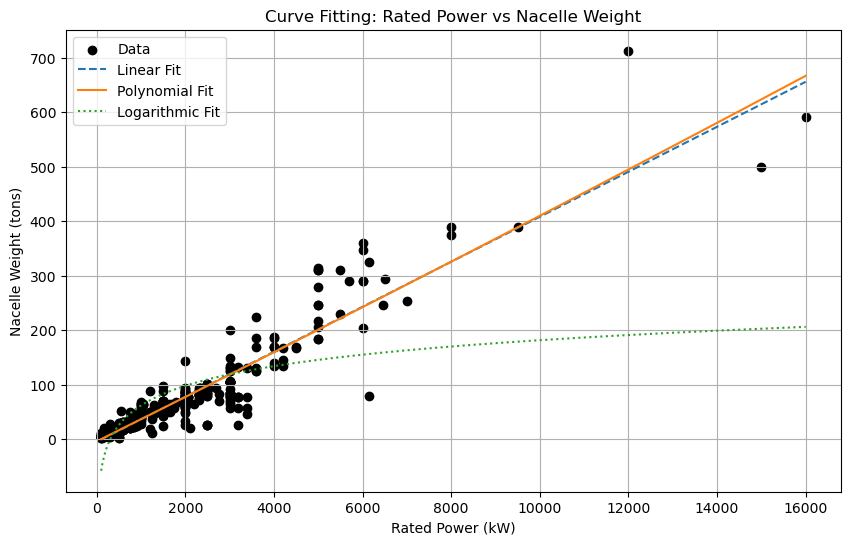

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extract x (Rated power) and y (Nacelle weight)
x = df_cleaned["Rated power"].values
y = df_cleaned["Nacelle weight"].values

# Define different fitting functions
def linear_func(x, a, b):
    return a * x + b

def poly_func(x, a, b, c):
    return a * x**2 + b * x + c

def log_func(x, a, b):
    return a * np.log(x) + b

def exp_func(x, a, b):
    return a * np.exp(b * x)

# Fit the models
params_linear, _ = curve_fit(linear_func, x, y)
params_poly, _ = curve_fit(poly_func, x, y)
params_log, _ = curve_fit(log_func, x, y)
params_exp, _ = curve_fit(exp_func, x, y, maxfev=10000)  # Increased iterations for better convergence

# Generate values for plotting
x_range = np.linspace(min(x), max(x), 1000)

# Compute fitted values
y_linear = linear_func(x_range, *params_linear)
y_poly = poly_func(x_range, *params_poly)
y_log = log_func(x_range, *params_log)
y_exp = exp_func(x_range, *params_exp)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="black", label="Data")
plt.plot(x_range, y_linear, label="Linear Fit", linestyle="dashed")
plt.plot(x_range, y_poly, label="Polynomial Fit")
plt.plot(x_range, y_log, label="Logarithmic Fit", linestyle="dotted")
#plt.plot(x_range, y_exp, label="Exponential Fit", linestyle="dashdot")

plt.xlabel("Rated Power (kW)")
plt.ylabel("Nacelle Weight (tons)")
plt.title("Curve Fitting: Rated Power vs Nacelle Weight")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
params_linear

array([ 0.04128314, -4.50957223])